# Формулы замещения длинной линии

![image](http://files3.vunivere.ru/workbase/00/02/13/11/images/image049.gif)

На рисунке выше представлена схема замещения длинной
линии Т-образным четырёхполюсником.
Параметры данной схемы определяются из соотношений:

$$
\begin{cases}
Z_1 = Z_2 = Z_W \frac{(\cosh{\gamma l - 1})}{\sinh{\gamma l}}
\\
Z_3 = Z_W \frac{1}{\sinh{\gamma l}}
\end{cases}
$$


# Простой вариант соединения: Источник напряжения подсоединён к нагрузке через длинную линию

$$
\begin{cases}
    U = \left(
            Z_1 + Z_3 + R_г
        \right) I_1
        -
        Z_3 I_2
    \\
    0 = -
        Z_3 I_1
        +
        \left(
            Z_2 + Z_3 + R_н
        \right) I_2
\end{cases}
$$

$$
\begin{cases}
    U
    =
    \left(
        Z_w
        \frac{cosh{(\gamma L)}-1}{sinh{(\gamma L)}}
        +
        Z_w
        \frac{1}{sinh{(\gamma L)}}
        + R_г
    \right) I_1
    -
    \left(
        Z_w
        \frac{1}{sinh{(\gamma L)}}
    \right) I_2
\\
    0
    =
    -
    \left(
        Z_w
        \frac{1}{sinh{(\gamma L)}}
    \right) I_1 
    +
    \left(
        Z_w
        \frac{cosh{(\gamma L)}-1}{sinh{(\gamma L)}}
        +
        Z_w
        \frac{1}{sinh{(\gamma L)}}
        + R_н
    \right) I_2
\end{cases}
$$

In [1]:
a11 <- "data$Zw*(1+(cosh(data$gamma*data$L)-1))/
(sinh(data$gamma*data$L))+
data$Zw*(1)/(sinh(data$gamma*data$L))+
data$Rg"
a22 <- "data$Zw*(1+(cosh(data$gamma*data$L)-1)/
(sinh(data$gamma*data$L)))+
data$Zw*(1)/(sinh(data$gamma*data$L))+
data$Rn"
a12 <- "-data$Zw/sinh(data$gamma * data$L)"
a21 <- "-data$Zw/sinh(data$gamma * data$L)"

b1 <- "data$U"
b2 <- "0"

In [2]:
data <- list()
data$gamma <- 0 + 1i*40
data$L <- 1
data$Rg <- 1
data$Rn <- 1
data$U <- 1
data$Zw <- 1

In [3]:
# Решатель уравнений, где freq - вектор частот генератора
solveX <- function(freq, data, A, B) {
    output <- data.frame(matrix(NA, nrow = nrow(A), ncol = 0))
    for (f in freq) {
        output[as.character(f)] <- solve(apply(X = A, MARGIN = c(1,2), FUN = function(x) {eval(parse(text = x))}),
                                         apply(X = B, MARGIN = c(1), FUN = function(x) {eval(parse(text = x))}))
    }
    return(output)
}

In [4]:
A <- matrix(c(a11, a21, a12, a22), nrow=2)
B <- matrix(c(b1, b2), nrow=2)

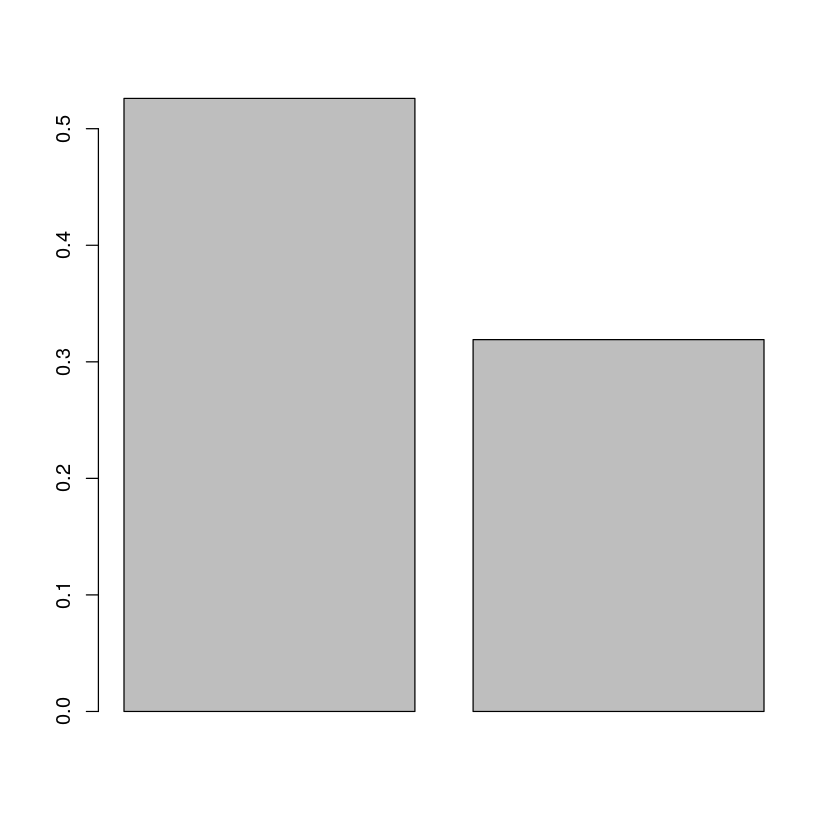

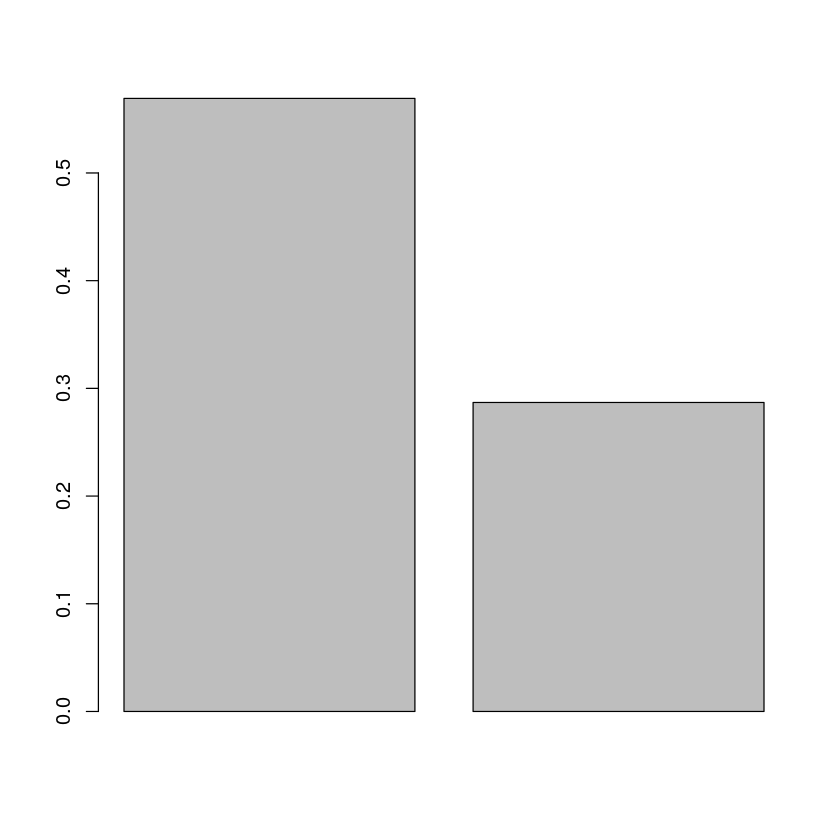

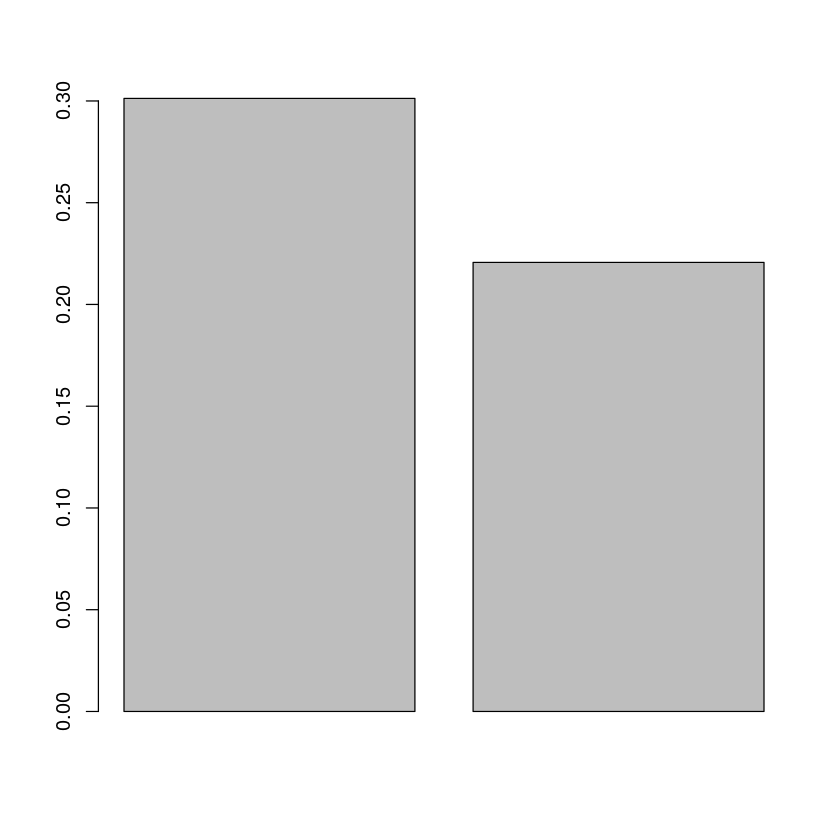

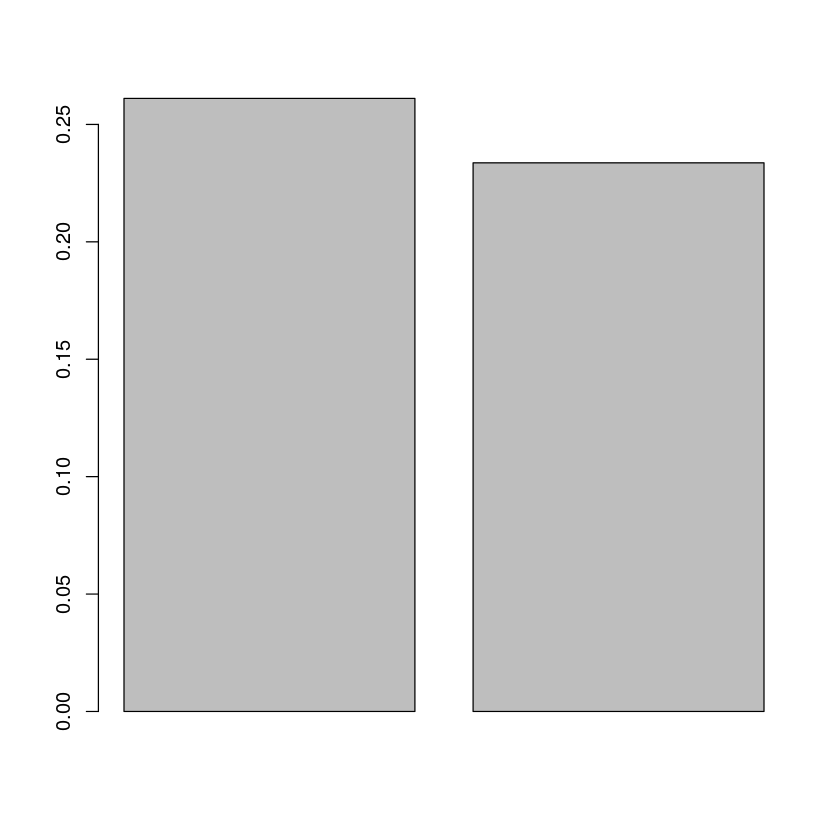

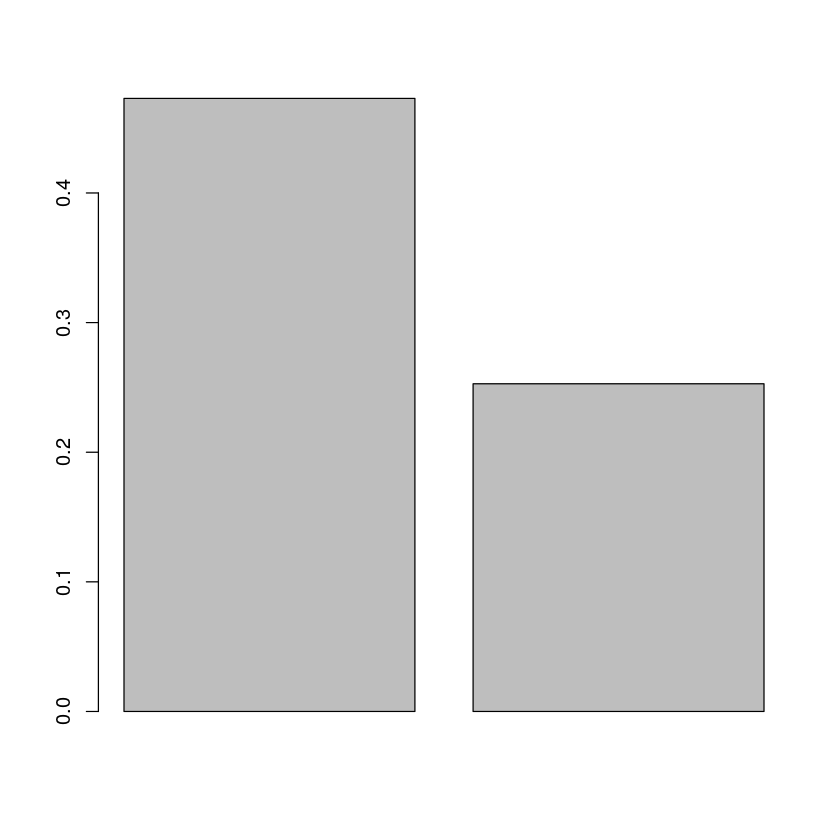

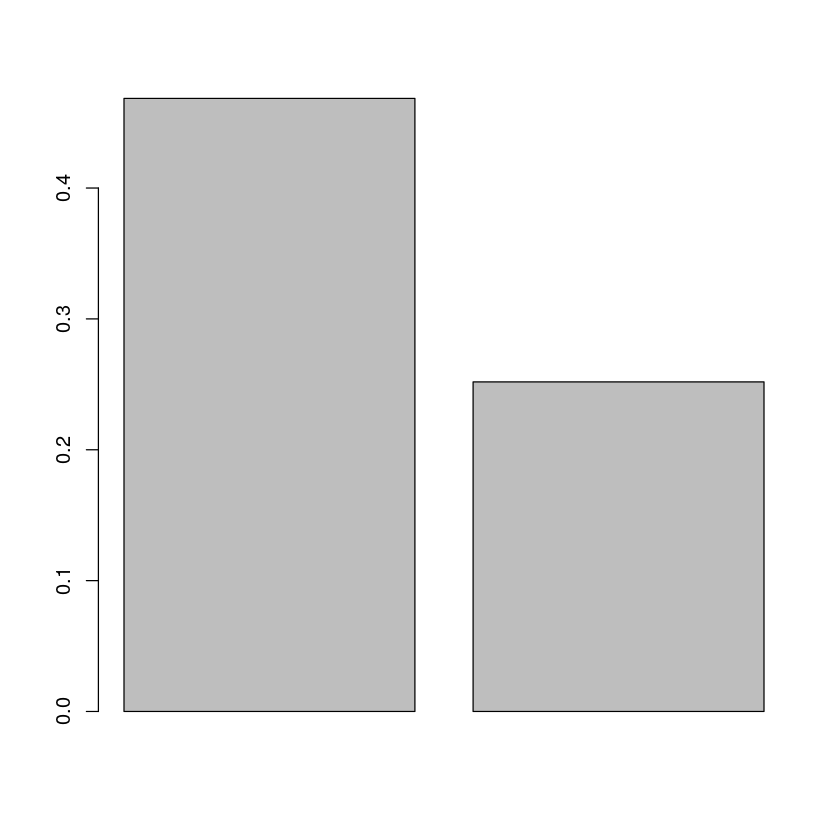

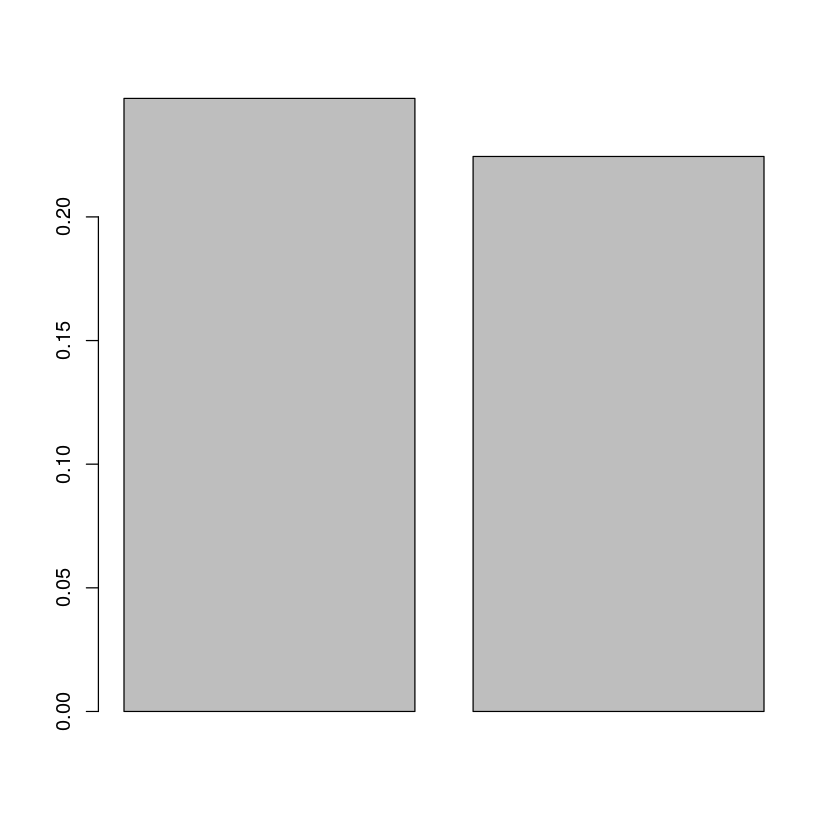

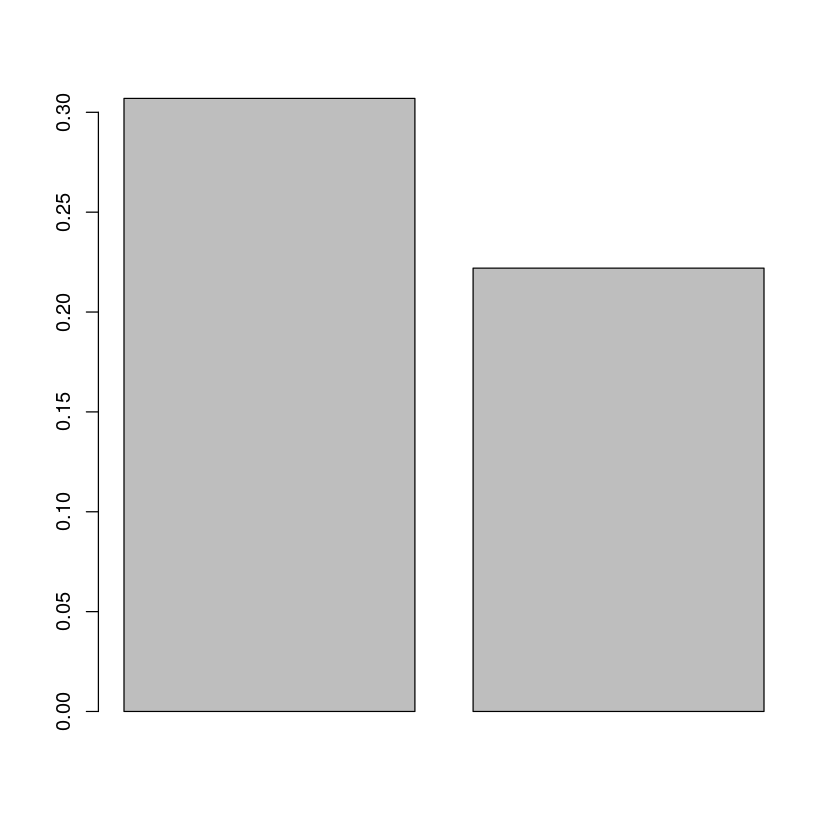

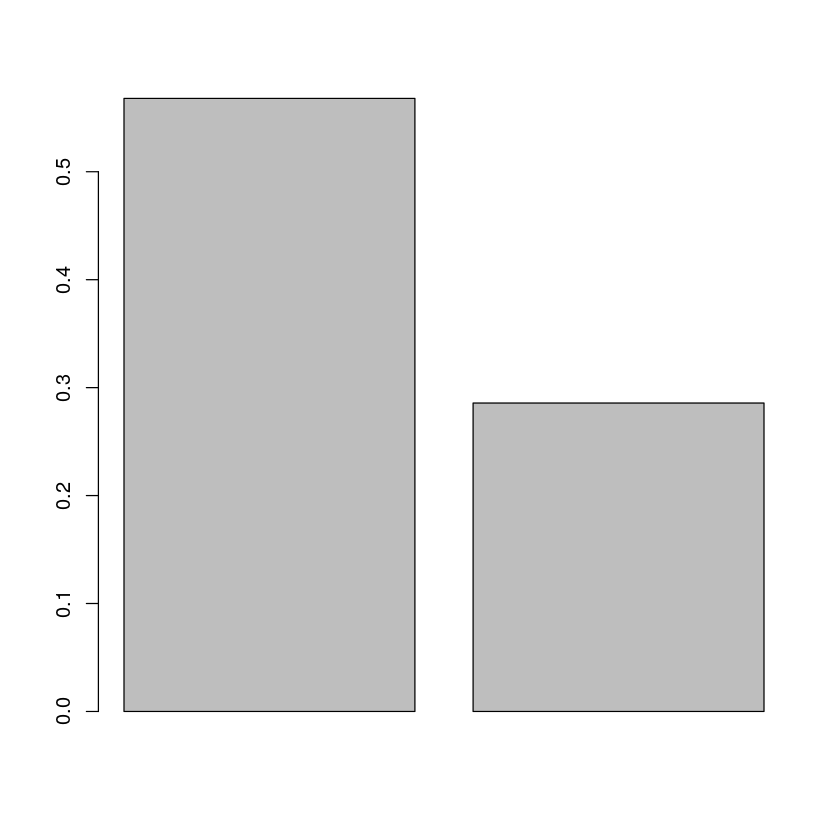

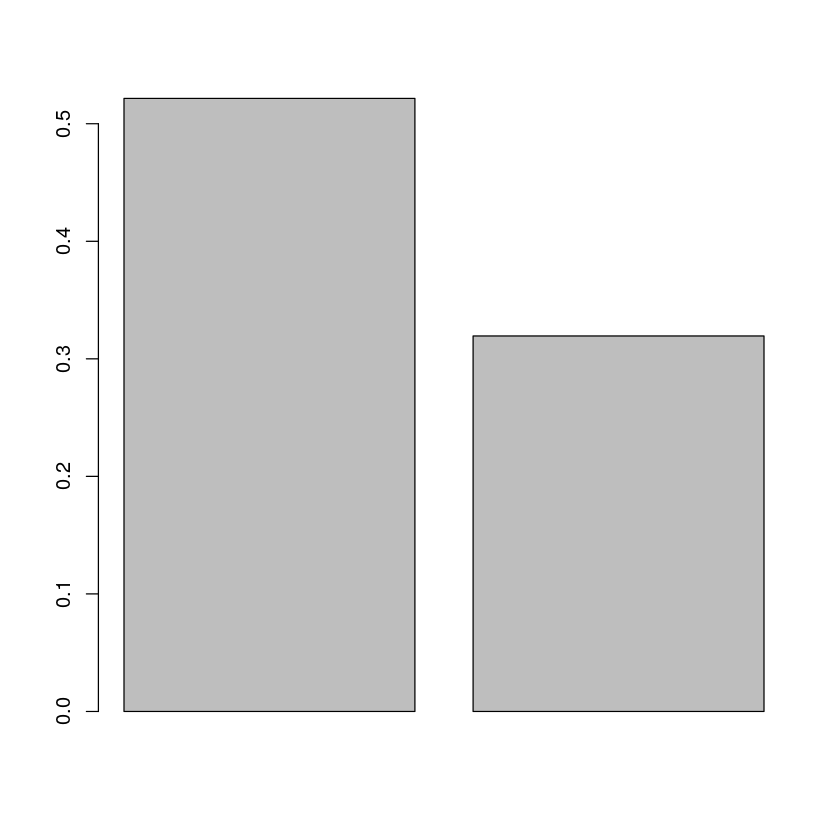

In [8]:
out <- list(x=NULL, y=NULL)
for (i in seq(0.1, 1, 0.1)) {
    data$L <- i
    solution <- solveX(1, data, A, B)
    barplot(c(Mod(solution[1,1]), Mod(solution[2,1])))
}

Warning message in atanh(seq(0, 10, 0.1)):
“NaNs produced”

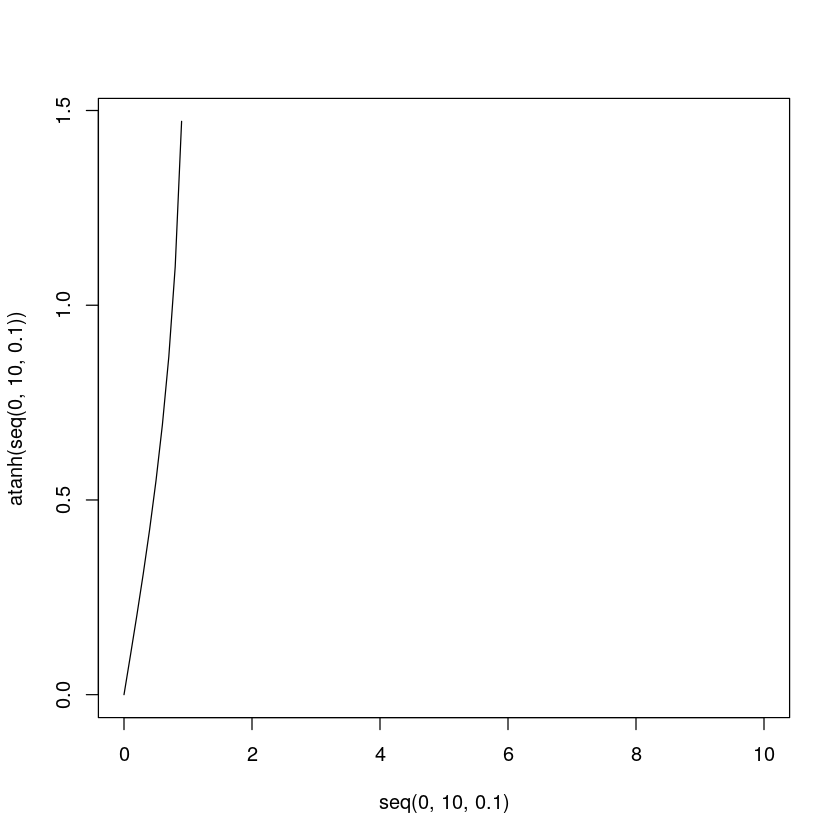

In [2]:
plot(seq(0,10,0.1), atanh(seq(0,10,0.1)), type="l")